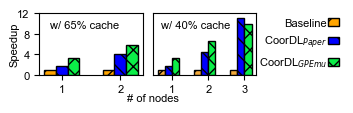

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fontsize=8
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = fontsize

fig = plt.gcf()
fig.set_dpi(100)

fig.set_size_inches(2.8, 0.8)
fig.subplots_adjust(wspace=0.1)
plt.subplot(1,2,1)

columns = ['nodes', 'baseline', 'gpemu', 'paper']

# ssd, 24 workers, 8 v100
df = pd.read_csv('65cache/data.csv', sep='\t', header=None, names=columns)

num_subcategories = 2
baseline_values = df['baseline'].tolist()
gpemu_values = df['gpemu'].tolist()
paper_values = df['paper'].tolist()

nodes = df['nodes'].tolist()
categories = nodes

bar_width = 0.2
index = np.arange(len(categories))

# Plotting the bar chart
plt.bar(index, baseline_values, bar_width, label='Baseline', color='orange', hatch="//", edgecolor="black")
plt.bar(index + 1 * bar_width, paper_values, bar_width, label='CoorDL$_{Paper}$', color='blue', hatch="\\\\", edgecolor="black")
plt.bar(index + 2 * bar_width, gpemu_values, bar_width, label='CoorDL$_{GPEmu}$', color='#0BEF48', hatch="xx", edgecolor="black")

plt.legend(loc="upper right", bbox_to_anchor=(3, 1.08), ncol=1, markerfirst=False, columnspacing=1, handlelength=1, handletextpad=0.1, frameon=False)

plt.ylim(0,12)
# Adding labels and title
plt.xticks(index + (bar_width * num_subcategories) / 2, categories, fontsize=fontsize)
plt.yticks(range(0,12+1, 4), range(0,12+1, 4), fontsize=fontsize)
plt.ylabel('Speedup', fontsize=fontsize, labelpad=-2)
plt.annotate("w/ 65% cache", xy=(0.1,9), xytext=(0,9))
# title = plt.title('(a) With 65% Local cache', fontsize=fontsize, pad=9)
# title.set_position((0.4, 0.5))


plt.subplot(1,2,2)

columns = ['nodes', 'baseline', 'gpemu', 'paper']

# ssd, 24 workers, 8 v100
df = pd.read_csv('40cache/data.csv', sep='\t', header=None, names=columns)

num_subcategories = 3
baseline_values = df['baseline'].tolist()
gpemu_values = df['gpemu'].tolist()
paper_values = df['paper'].tolist()

nodes = df['nodes'].tolist()
categories = nodes

bar_width = 0.2
index = np.arange(len(categories))

# Plotting the bar chart
plt.bar(index, baseline_values, bar_width, label='Baseline', color='#F2AA3C', hatch="//", edgecolor="black")
plt.bar(index + 1 * bar_width, paper_values, bar_width, label='CoorDL-Paper', color='blue', hatch="\\\\", edgecolor="black")
plt.bar(index + 2 * bar_width, gpemu_values, bar_width, label='CoorDL-GPEmu', color='#0BEF48', hatch="xx", edgecolor="black")

plt.ylim(0,12)
# Adding labels and title
plt.xticks(index + (bar_width * num_subcategories) / 2, categories, fontsize=fontsize)
plt.yticks([])
plt.xlabel('# of nodes', fontsize=fontsize, x=-0, labelpad=-1)
plt.annotate("w/ 40% cache", xy=(0.1,9), xytext=(0,9))
# plt.ylabel('Speedup', fontsize=fontsize, labelpad=20)
# plt.title('(b) With 40% Local cache',fontsize=fontsize, pad=9, x=0.55)


plt.savefig('speedup.eps',  bbox_inches='tight')
# Displaying the chart
plt.show()
